# Artificial Neural Networks (ANN)

## Table of Contents

* [Background](#Background)
    
* [How it Works](#How-it-Works)
    
* [Algorithm](#Algorithm)

* [Tips](#Tips)

* [Example: MNIST Dataset](#Example:-MNIST-Dataset)

    * [Custom Neural Network](#Custom-Neural-Network)
    
    * [Keras Neural Network](#Keras-Neural-Network)

## Background

The latest resurgence of research in artificial intelligence and machine learning can all be attributed to the latest advancements in the backpropogation algorithm and the Artificial Neural Network (ANN) model. This model was originally invented by Warren McCulloch and Walter Pitts in 1943, which began to stagnate in 1969, until interest was renewed in 1975 when Paul Werbos introduced his backpropogation algorithm. The main causes of the stagnation were due to the limitations of neural networks, pointed out by Marvin Minsky and Seymour Papert, which included the inability of the perceptron, the basic unit of a neural network, to calculate the exclusive-or circuit and the fact that computers didn't have enough processing power to effectively handle the work required by large neural networks. The backpropogation algorithm solved both of these problems by making the training of multi-layer neural networks both possible and efficient.

## How it Works

The architecture of a neural network is modeled on the structure of neurons in the human brain; taking input signals and propogating those signals to other neurons, in turn, performing some sort of calculation in the process which results in an output. The neural network model takes the inner workings of the biological neuron and, argueably,  simplifies it down to an input-output function. There are several key characteristics that define a neural network; those include: an activation function, a learning rate, backpropogation, a cost function, and a mechanism for updating weights. Let's consider a simple ANN structure consisting of 3 input nodes, a single hidden layer with 4 nodes, and an output layer with 2 nodes as shown below.

In [14]:
![](images/"img_1.png")

/bin/sh: -c: line 0: syntax error near unexpected token `images/"img_1.png"'
/bin/sh: -c: line 0: `[](images/"img_1.png")'


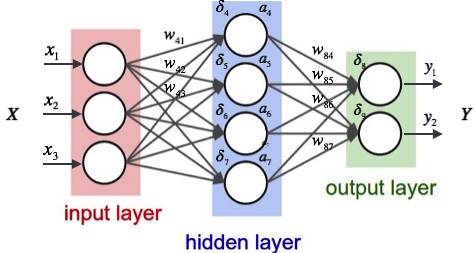

In [4]:
Image(filename = 'images/img_1.png')

In an ANN, you have an **input layer**, an **output layer**, and an arbitrary number of **hidden layers**, the layers that lie in between the input and the output. In each layer lie perceptrons which are called the **nodes**. Each node of each layer is connected to all other nodes in both the preceeding and proceeding layers, unless they are input or output layers in which case only one of the two apply. Now, quantitative input signal(s), training observations, enter the ANN at the input layer. Each signal is then propogated forward to the next layer but not before being applied a **weight**. Each signal, represented as a black arrow in the figure above, possesses its own weight which is, initially, assigned randomly with a value between zero and one. These weights are the source of an ANN's ability to calculate the output using its input. The signal that a node obtains in the following layer is the sum of the products of the signal and their corresponding weights. 

Before the signals continue on to the following layers, the signals recieved from the input nodes are passed through an **activation function**, commonly the sigmoid function, which is used to simulate neurons 'failing' to fire a signal until they reach some threshold level of signals from other neurons.

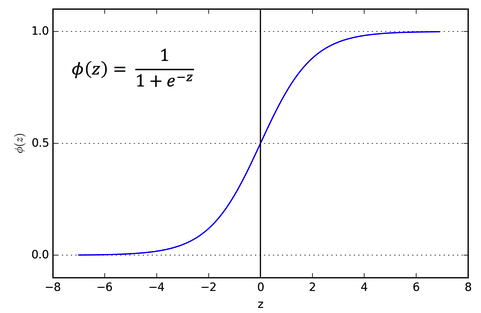

In [5]:
Image(filename = 'images/img_2.png')

The signals continue this process of being applied weights and passing through activation functions until it reaches the output layer and the final output is produced. The resulting output of the ANN is then compared to the true value of the output. The difference between the two, the error, is determined using a **cost function**. There are various cost functions one may use including mean squared error, maximum likelihood, and sum squared error. The function one uses is dependent on the goal of the analyst and the interpretation of the output.

The next step is to use the error to update the weights throughout the model. The error is propogated backwards into the model and split amongst the nodes with more of the error going to those contributing connections which had greater link weights as they contributed more to the error; this is called **backpropogation**. The proportion of the error given to a node is defined by (node weight/ sum of signal weights).

To actually update the weights, we utilize **gradient descent** which is an optimization algorithm that determines how the error rate changes as the weight of some link, (w)ij changes; the slope of the gradient. The goal is to minimize this slope as much as possible. This slope is calculated as follows:

\begin{equation*}
\frac{\partial E}{\partial w_{ij}} = -(e_j) * sigmoid\left( \sum_{i} w_{ij} o_i \right) * (1 - sigmoid\left( \sum_{i} w_{ij} o_i \right)) * o_i
\end{equation*}

\begin{equation*}
\frac{\partial E}{\partial w_{jk}} = -(t_k - o_k) * sigmoid\left( \sum_{j} w_{jk} o_j \right) * (1 - sigmoid\left( \sum_{j} w_{jk} o_j \right)) * o_j
\end{equation*}

[Here](https://youtu.be/5u0jaA3qAGk?t=240) is a clip of a video by Welch Labs that illustrates the process of gradient descent.

The first formula applies to weights between the input and first hidden layer while the second applies to the weights between hidden layers and between the last hidden layer and the output layer. The first part is simply the (target - actual) error. The sum expression inside the sigmoids is the signal into the final layer node; it’s the signal into a node before the activation function is applied. The last part, oj, is the output from the previous hidden layer node j. For any weight, the result of this function is used to assign a new weight by the following:

\begin{equation*}
new(w_{jk}) = old(w_{jk}) - \alpha\ * \frac{\partial E}{\partial w_{jk}}
\end{equation*}

When the weights are updated after each input observation is evaluated, it is called *Stochastic Gradient Descent*. If the weights are updated only after all of the observations have been evaluated, it is called *Batch Gradient Descent*. The former is the standard used as it prevents the model from getting stuck in local minimas. Alpha represents the **learning rate**. The link weights in the model need to be updated in such a way that changes to the link weights are not overwhelmed by any single training example. The learning rate is a value that scales the suggested change to the weight so that it is not over-exaggerated.

## Algorithm

The machine learning community has iterated feverishly on the classic ANN structure creating numerous packages allowing one to use neural nets straight out of the box. Although, it is important for a data scientist to be able to build his/her own neural net from scratch in order to solidify their understanding of the model. In addition, building a model from scratch allows one to improve on its structure to increase efficiency in numerous ways.

In [1]:
# A simple, 3-layer ANN

class neuralNetwork:

    # initialise the neural network
    def __init__(self, inputnodes, hiddennodes, outputnodes, learningrate):
        self.inodes = inputnodes # set number of nodes in each input, hidden, output layer
        self.hnodes = hiddennodes
        self.onodes = outputnodes
        self.wih = np.random.normal(0.0, pow(self.hnodes, -0.5), (self.hnodes, self.inodes))# link weight matrices, wih and who
        self.who = np.random.normal(0.0, pow(self.onodes, -0.5), (self.onodes, self.hnodes))# weights inside the arrays are w_i_j, where link is from node i to node j in the next layer
        self.lr = learningrate # learning rate
        self.activation_function = lambda x: sps.expit(x) # activation function is the sigmoid function
        
        pass
    
    # train the neural network
    def train(self, inputs_list, targets_list):
        # convert inputs list to 2d array
        inputs = np.array(inputs_list, ndmin=2).T
        targets = np.array(targets_list, ndmin=2).T

        # calculate signals into hidden layer
        hidden_inputs = np.dot(self.wih, inputs)
        # calculate the signals emerging from hidden layer
        hidden_outputs = self.activation_function(hidden_inputs)

        # calculate signals into final output layer
        final_inputs = np.dot(self.who, hidden_outputs)
        # calculate the signals emerging from final output layer
        final_outputs = self.activation_function(final_inputs)

        # output layer error is the (target - actual)
        output_errors = targets - final_outputs
        # hidden layer error is the output_errors, split by weights, recombined at hidden nodes
        hidden_errors = np.dot(self.who.T, output_errors)

        # update the weights for the links between the hidden and output layers
        self.who += self.lr * np.dot((output_errors * final_outputs * (1.0 - final_outputs)), np.transpose(hidden_outputs))

        # update the weights for the links between the input and hidden layers
        self.wih += self.lr * np.dot((hidden_errors * hidden_outputs * (1.0 - hidden_outputs)), np.transpose(inputs))

        pass
    
    # query the neural network
    def query(self, inputs_list):
        # convert inputs list to 2d array
        inputs = np.array(inputs_list, ndmin=2).T

        # calculate signals into hidden layer
        hidden_inputs = np.dot(self.wih, inputs)
        # calculate the signals emerging from hidden layer
        hidden_outputs = self.activation_function(hidden_inputs)

        # calculate signals into final output layer
        final_inputs = np.dot(self.who, hidden_outputs)
        # calculate the signals emerging from final output layer
        final_outputs = self.activation_function(final_inputs)

        return final_outputs

## Tips

* Rescale inputs into the range of 0 to 1, or 0.01 to 0.99. Some will add a small offset to the inputs, like 0.01, just to avoid having zero inputs which are troublesome because they kill the learning ability by zeroing the weight update expression by setting that oj = 0.


* Avoid large initial weights as they reduce the model's ability to learn better weights. Initializing weights randomly and uniformly from a range between -1.0 to +1.0 will suffice. Rules of thumb are available for specific network shapes and specific activation functions. Makes sure each weight is different and that no weight is zero.


* There are several ways you can improve your ANN:
    * Adjust the learning rate.
    * Repeat the training several times against the dataset; tweaking the number of 'epochs'.
    * Change the number of hidden nodes/layers.
    * Try a different activation function. (i.e. Threshold Function, Rectifier Function, Hyperbolic Tangent/tanh)
    * Try a different cost function.
    * Change the type of input data you feed into the network.
    
    
* Run experiments and plot your data so that you can visualize how the performance of your ANN changes as you tweak one parameter or another.

## Example: MNIST Dataset

We will create an artificial neural network and use the MNIST dataset, created by Yann LeCun, which consists of images of handwritten digits and the grey levels of each pixel in the image. The data can be found [here](http://yann.lecun.com/exdb/mnist/).

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.special as sps
from sklearn.metrics import classification_report, confusion_matrix

%matplotlib inline

In [3]:
train = pd.read_csv('mnist_train.csv')

test = pd.read_csv('mnist_test.csv')

In [4]:
train.head()

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
train.shape

(60000, 785)

In [6]:
test.head()

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
test.shape

(10000, 785)

In [8]:
sorted(train['label'].unique())

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

In [9]:
# Let's scale the data so that all values are between 0.01 - 1.00 instead of 0-255; we'll need to divide by 255 then 
# multiply by 0.99 and then add 0.01 to each value.

train_new = train.iloc[:,1:].applymap(lambda x: ((x/255)*0.99) + 0.01)

train_new['label'] = train['label']

train_new = np.array(train_new)

In [10]:
test_new = test.iloc[:,1:].applymap(lambda x: ((x/255)*0.99) + 0.01)

test_new['label'] = test['label']

test_new = np.array(test_new)

The ANN, in this case, will act as a classifier labeling each observation with the number it thinks it 'sees' between
0 and 9. So, we can have 10 neurons in the output layer, one for each number 0-9, and, in theory, the numbered neuron that matches the number in the image should be the only one to fire, all others being silent.

The target label for any single observation will be 0.99 at the correct neuron and 0.01 averywhere else. This can be 
represented as a vector 

### Custom Neural Network

In [11]:
# number of input, hidden and output nodes
input_nodes = 784
hidden_nodes = 200
output_nodes = 10

# learning rate is 0.1
learning_rate = 0.1

# create instance of neural network
n = neuralNetwork(input_nodes,hidden_nodes,output_nodes, learning_rate)

In [12]:
for obs in train_new:
    targets = np.zeros(output_nodes) + 0.01
    targets[int(obs[-1])] = 0.99
    n.train(obs[0:-1],targets)
    pass

In [13]:
# Test the neural network

# scorecard for how well the network performs, initially empty
scorecard = []

# go through all the records in the test data set
for record in test_new:
    
    # correct answer is first value
    correct_label = int(record[-1])
    #print(correct_label, " is the correct label")

    # query the network
    outputs = n.query(record[0:-1])

    # the index of the highest value corresponds to the label
    label = np.argmax(outputs)
    #print(label, " is the network's answer")

    # append correct or incorrect to list
    if (label == correct_label):
        # network's answer matches correct answer, add 1 to scorecard
        scorecard.append(1)
    else:
        # network's answer doesn't match correct answer, add 0 to scorecard
        scorecard.append(0)
        pass

    pass

In [14]:
from collections import Counter
print('Percent Accuracy: ', round(((Counter(scorecard)[1])/10000)*100,2), '%')

Percent Accuracy:  95.7 %


Here, we see that our ANN has become a classifier with a test accuracy of ~96%. We can be sure that tweaking the numerous parameters in the model would be able to increase the accuracy even further.

### Keras Neural Network

When not producing a state-of-the-art model, there are many packages and environments that one can take advantage of when creating an artificial neural network. Such well known packages include 'Keras', 'TensorFlow', and 'Theano'. Theano is an open source compuation library that makes fast, efficient computation on the computer's GPU. TensorFlow is a package, similar to Theano, created by Google. Keras is an open source neural network library written in Python capable of running on top of TensorFlow and Theano. Here, we will use Keras to build an ANN similar to our simple, previous 3-layer model.

In [21]:
# Importing the Keras libraries and packages

import keras
from keras.models import Sequential
from keras.layers import Dense

In [25]:
# Recreating the input data

train_new = train.iloc[:,1:].applymap(lambda x: ((x/255)*0.99) + 0.01)

train_new['label'] = train['label']

x_train = np.array(train_new.iloc[:,0:-1])

y_train = []
for obs in train_new.iloc[:,-1]:
    target = list(np.zeros(10) + 0.01)
    target[int(obs)] = 0.99
    y_train.append(target)

y_train = np.array(y_train)

In [27]:
test_new = test.iloc[:,1:].applymap(lambda x: ((x/255)*0.99) + 0.01)

test_new['label'] = test['label']

x_test = np.array(test_new.iloc[:,0:-1])
y_test = np.array(test_new.iloc[:,-1])

In [28]:
# Initializing the ANN
classifier = Sequential()

# Adding the input layer and the first hidden layer
classifier.add(Dense(units = 200, kernel_initializer = 'uniform', activation = 'sigmoid', input_dim = 784))

# If adding another hidden layer
# classifier.add(Dense(units = 6, kernel_initializer = 'uniform', activation = 'sigmoid'))

# Adding the output layer
classifier.add(Dense(units = 10, kernel_initializer = 'uniform', activation = 'softmax'))

# Compiling the ANN
classifier.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

# Fitting the ANN to the Training set
classifier.fit(x_train, y_train, batch_size = 1, epochs = 1)

Epoch 1/1
60000/60000 [==============================] - 190s 3ms/step - loss: 0.7015 - acc: 0.9419


In [29]:
# Predicting the test set results

y_pred = classifier.predict(x_test)
y_pred = [np.argmax(item) for item in y_pred]

In [30]:
# scorecard for how well the network performs, initially empty
scorecard = []

# go through all the records in the test data set
for i in range(0,len(y_pred)):

    # append correct or incorrect to list
    if (y_pred[i] == y_test[i]):
        # network's answer matches correct answer, add 1 to scorecard
        scorecard.append(1)
    else:
        # network's answer doesn't match correct answer, add 0 to scorecard
        scorecard.append(0)

In [31]:
print('Percent Accuracy: ', round(((Counter(scorecard)[1])/10000)*100,2), '%')

Percent Accuracy:  96.85 %


We have used the Keras package to create a neural network model, identical to the one built from scratch, that has an  improved accuracy of ~97% and was built with fewer lines of code than were necessary to process the input data. This just goes to show the power that packages such as Keras provide to the common user. With such packages, one has the ability to easily build more complex and deeper neural networks. Deep learning constitutes the work done by an artificial neural network that possesses multiple hidden layers in its structure. Standardized packages make the creation of such complex models easier than ever before.